LANGKAH 1 - Import Library

In [26]:
# melakukan import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

LANGKAH 2 - Load Data dan Visualisasi

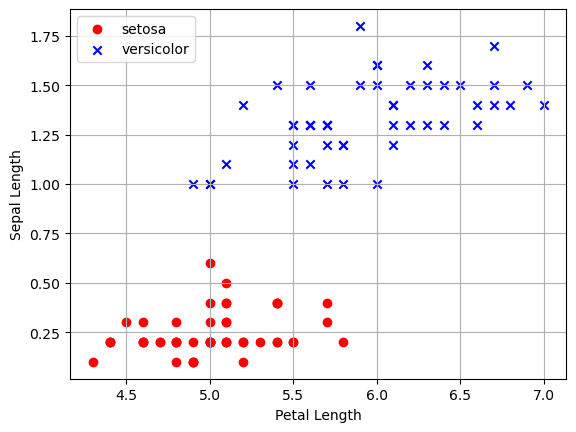

In [27]:
# memanggil path file dataset
df = pd.read_csv('iris.csv', header=None)

# membuat variabel untuk tiap klasifikasi
setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
virginica = df[df[4] == 'Iris-virginica']

a, b = 0, 3
# membuat simbol/mark untuk variabel setosan dan versicolor
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length') # memberi label sumbu x
plt.ylabel('Sepal Length') # memberi label sumbu x
plt.legend(loc='upper left') # menentukan lokasi keterangan indikator
plt.grid() # menampilkan grid pada visualisasi
plt.show() # menampilkan hasil visualisasi

LANGKAH 3 - Membuat Kelas Percepton

In [28]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10): # menentukan learning rate (eta) dan banyak iterasi (n_iter)
        self.eta = eta #inisialisasi atribut eta dengan nilai argumen eta
        self.n_iter = n_iter #inisialisasi atribut n_iter dengan nilai argumen n_iter
    
    def fit(self, X, y):
        #menginisialisasi atribut w_ dengan nilai nol
        #Atribut w_ menyimpan parameter model
        self.w_ = np.zeros(1 + X.shape[1])

        #menginisialisasi atribut w_ dengan nilai nol
        #Atribut errors_ menyimpan jumlah kesalahan dalam setiap iterasi.
        self.errors_ = []
        
        for _ in range(self.n_iter): #melakukan looping sebanyak n_iter
            errors = 0
            for xi, target in zip(X, y): #looping sebanyak data train (xi)
                #menghitung pembaruan untuk parameter model 
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update #memperbarui parameter konstan model
                self.w_[1:] += update * xi # memperbarui parameter koefisien model
                errors += int(update != 0.0) #menghitung jumlah error dalam iterasi
            self.errors_.append(errors) #menambah jumlah error ke daftar self.errors_
        return self #mengembalikan objek self
    
    #fungsi menghitung net input
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    #Fungsi memprediksi nilai target untuk data baru X.
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

LANGKAH 4 - Pilih Data dan Encoding Label

In [29]:
y = df.iloc[0:100, 4].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[0:100, [0, 3]].values # slice data latih

LANGKAH 5 - Fitting Model

In [30]:
#membuat objek ppn dari kelas Perceptron
ppn = Perceptron(eta=0.1, n_iter=10) 
#melatih objek ppn dengan menggunakan data latih X dan target y.
ppn.fit(X, y)

LANGKAH 6 - Visualisasi Nilai Error Per Epoch

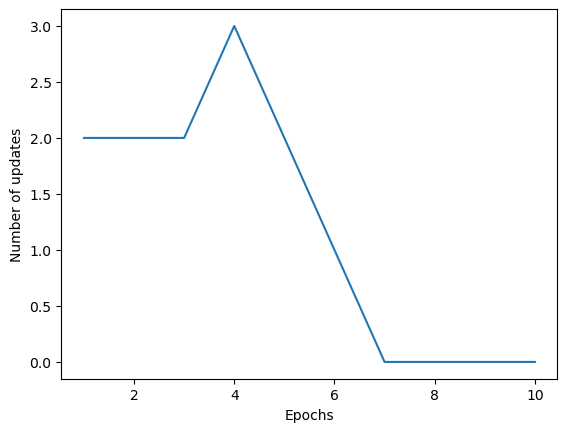

In [31]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

LANGKAH 7 - Visualisasi Decisison Boundary

C:\Users\sukma\AppData\Local\Temp\ipykernel_1244\1493572623.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


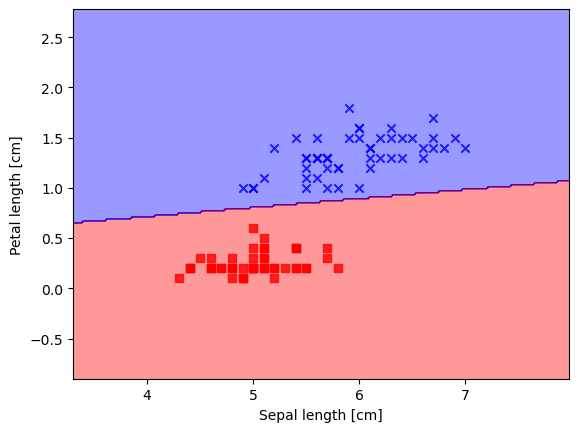

In [38]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

#menampilkan hasil visualisasi
plot_decision_regions(X, y, ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.show()